<a href="https://colab.research.google.com/github/hufsaim/T10302201/blob/main/notebook_2023/lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal
from IPython.display import Audio
import os
import glob

## 여러 개의 wav파일들의 목록을 만든 후, 그 중 하나의 파일을 가져와 음성신호를 확인합니다.

In [ ]:
path0 = 'mywav'
flist = np.random.permutation(glob.glob(path0+'/*.wav'))
flist

array(['mywav/s4.wav', 'mywav/s1.wav', 'mywav/s2.wav', 'mywav/s3.wav'],
      dtype='<U12')

In [ ]:
fs,d1 = wavfile.read(flist[0])
t = np.arange(0,len(d1))/fs
freq = np.fft.fftfreq(len(t),1/fs)
noise = np.random.normal(0,1,d1.shape) *np.std(d1)

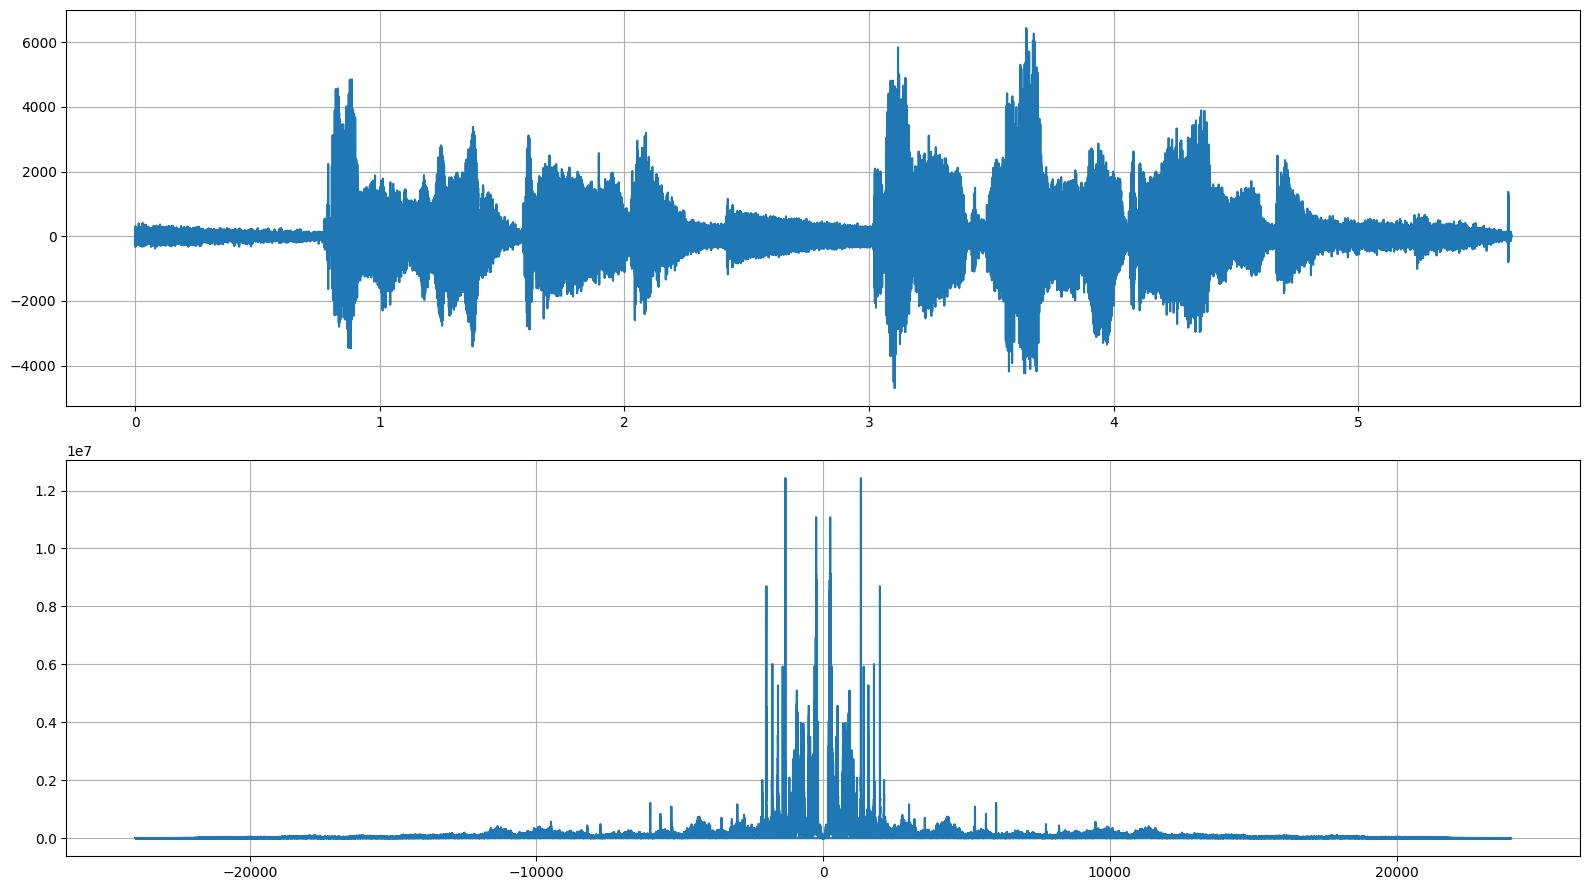

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(t,d1)
plt.grid('on')

plt.subplot(212)
plt.plot(freq,np.abs(np.fft.fft(d1)))
plt.grid('on')

plt.tight_layout()
plt.show()

In [ ]:
Audio(d1,rate=fs)

## Lowpass filtering
- cutoff frequency를 바꾸어가며 lowpass filtering의 효과를 음성신호의 변화로 확인합니다.
- Frequency domain에서 음의 주파수에 해당하는 부분을 0으로 하였을 때 음성신호에는 어떤 영향이 있나요?

In [ ]:
wc = 1000
H = np.ones_like(d1)
#H[freq<0]=0
H[np.abs(freq)>wc]=0

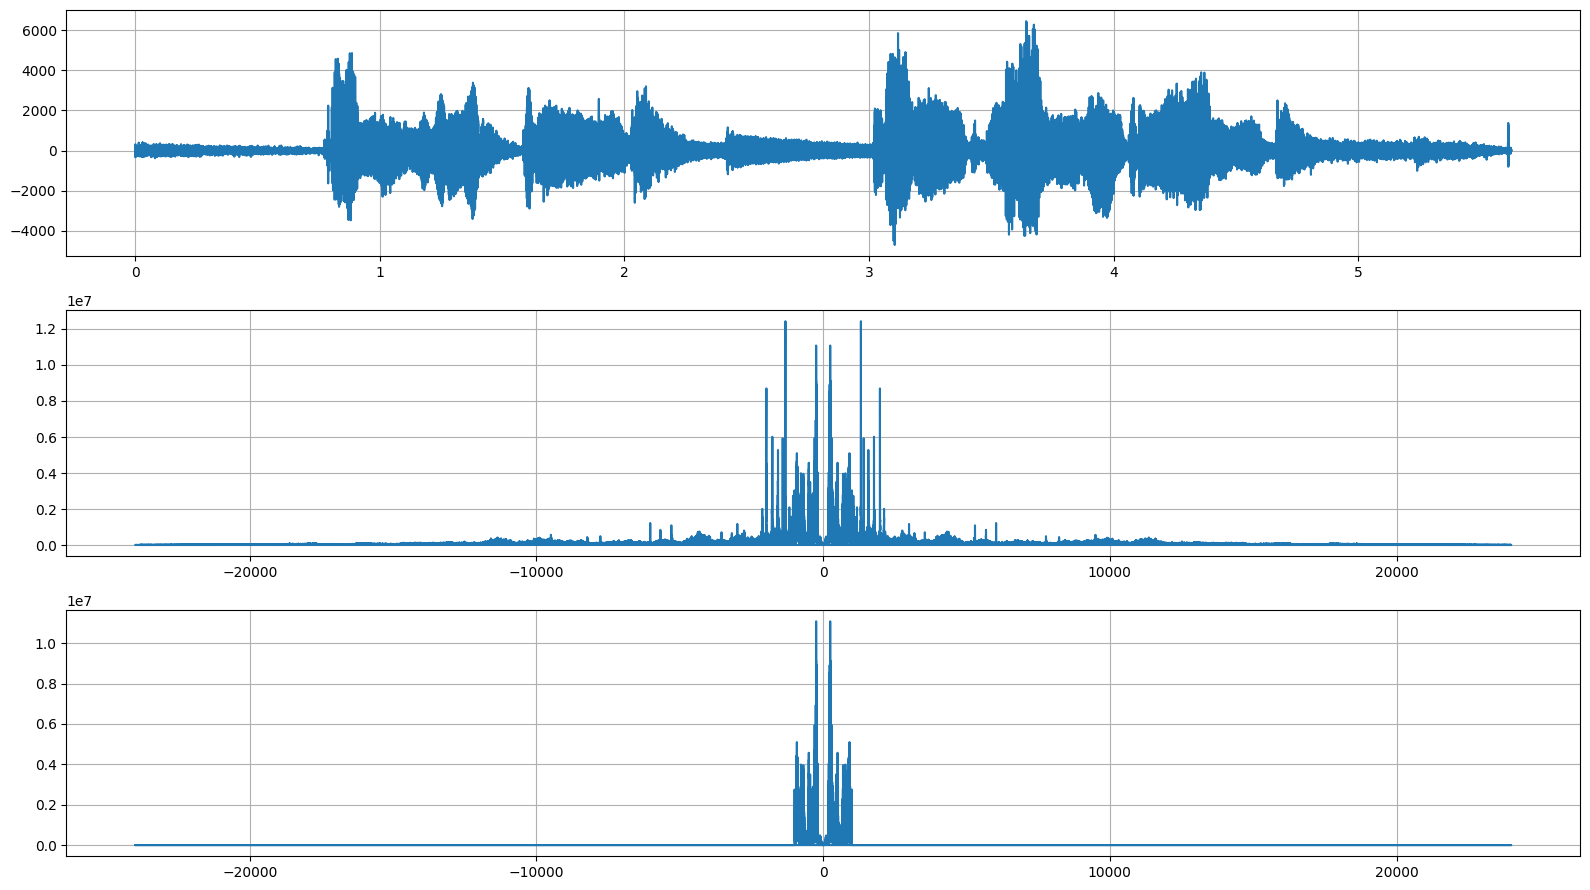

In [ ]:
D1 = np.fft.fft(d1)
Y1 = np.fft.fft(d1)*H

plt.figure(figsize=(16,9))
plt.subplot(311)
plt.plot(t,d1)
plt.grid('on')

plt.subplot(312)
plt.plot(freq,np.abs(D1))
plt.grid('on')

plt.subplot(313)
plt.plot(freq,np.abs(Y1))
plt.tight_layout()
plt.grid('on')
plt.show()

In [ ]:
r1 = np.fft.ifft(Y1)
plt.figure(figsize=(16,9))
plt.plot(t,np.real(r1))
plt.grid('on')
plt.show()
Audio(r1,rate=fs)

## 여러 wav파일을 합성하기

In [ ]:
fs,d1 = wavfile.read(flist[0])
fs,d2 = wavfile.read(flist[1])
fs,d3 = wavfile.read(flist[2])
fs,d4 = wavfile.read(flist[3])

d1 = (d1 - np.mean(d1))/np.std(d1)
d2 = (d2 - np.mean(d2))/np.std(d2)
d3 = (d3 - np.mean(d3))/np.std(d3)
d4 = (d4 - np.mean(d4))/np.std(d4)

Nmax = np.max([len(d1),len(d2),len(d3),len(d4)])

d1 = np.pad(d1,(0,Nmax-len(d1)))
d2 = np.pad(d2,(0,Nmax-len(d2)))
d3 = np.pad(d3,(0,Nmax-len(d3)))
d4 = np.pad(d4,(0,Nmax-len(d4)))

t = np.arange(0,Nmax)/fs
freq = np.fft.fftfreq(len(t),1/fs)

plt.figure(figsize=(16,9))
plt.plot(t,d1+d2+d3+d4)
plt.grid('on')
plt.tight_layout()
plt.show()

Audio(d1+d2+d3+d4,rate=fs)

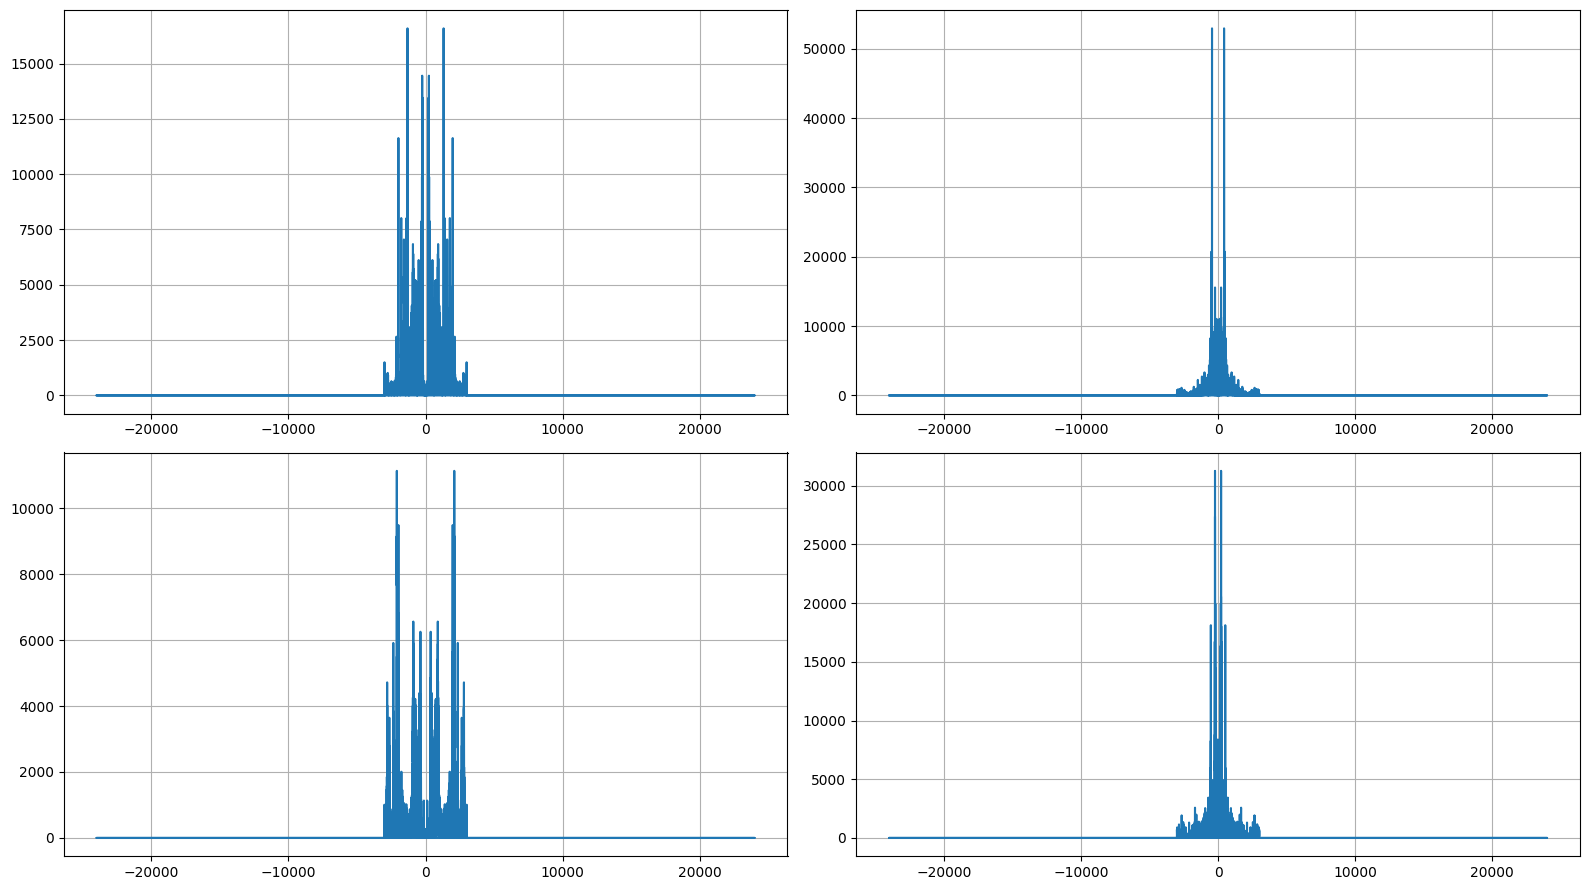

In [ ]:
wc = 3000
H = np.ones_like(d1)
#H[freq<0]=0
H[np.abs(freq)>wc]=0


Y1 = np.fft.fft(d1)*H
Y2 = np.fft.fft(d2)*H
Y3 = np.fft.fft(d3)*H
Y4 = np.fft.fft(d4)*H

plt.figure(figsize=(16,9))

plt.subplot(221)
plt.plot(freq,np.abs(Y1))
plt.grid('on')

plt.subplot(222)
plt.plot(freq,np.abs(Y2))
plt.grid('on')

plt.subplot(223)
plt.plot(freq,np.abs(Y3))
plt.grid('on')

plt.subplot(224)
plt.plot(freq,np.abs(Y4))
plt.tight_layout()
plt.grid('on')

plt.show()

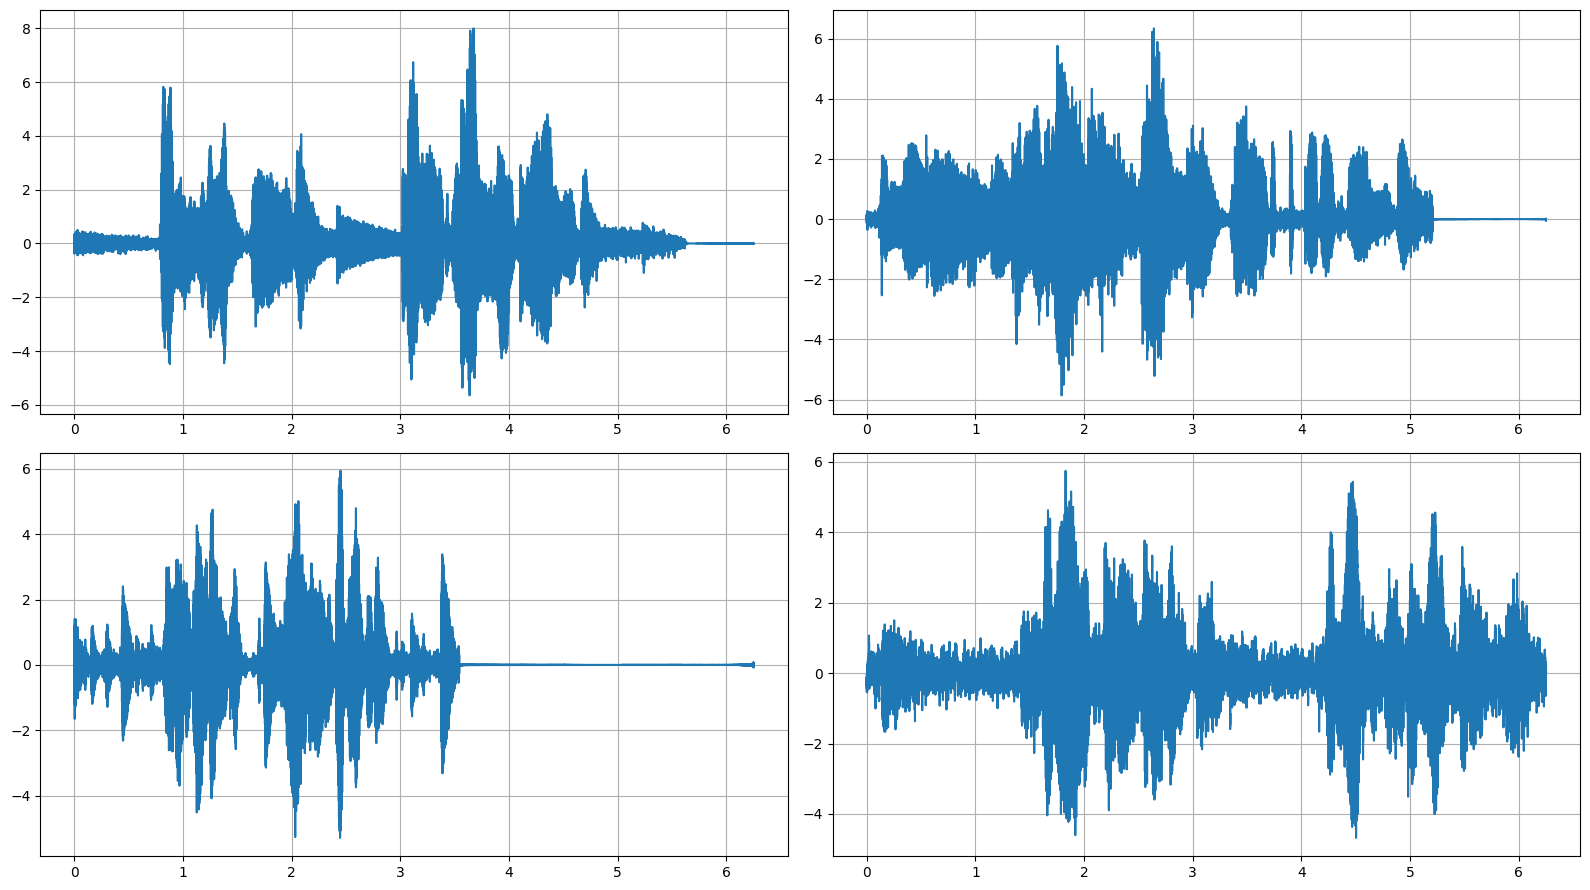

In [ ]:
r1 = np.fft.ifft(Y1)
r2 = np.fft.ifft(Y2)
r3 = np.fft.ifft(Y3)
r4 = np.fft.ifft(Y4)
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.plot(t,np.real(r1))
plt.grid('on')
plt.subplot(222)
plt.plot(t,np.real(r2))
plt.grid('on')
plt.subplot(223)
plt.plot(t,np.real(r3))
plt.grid('on')
plt.subplot(224)
plt.plot(t,np.real(r4))
plt.grid('on')
plt.tight_layout()
plt.show()

- 각각을 lowpass filtering하고, 신호를 합쳐서 어떻게 들려지는 지 확인합니다.

In [ ]:
Audio(r1+r2+r3+r4,rate=fs)

## 각각의 신호를 다른 주파수로 modulation을 진행하고, 하나의 신호로 합성하기

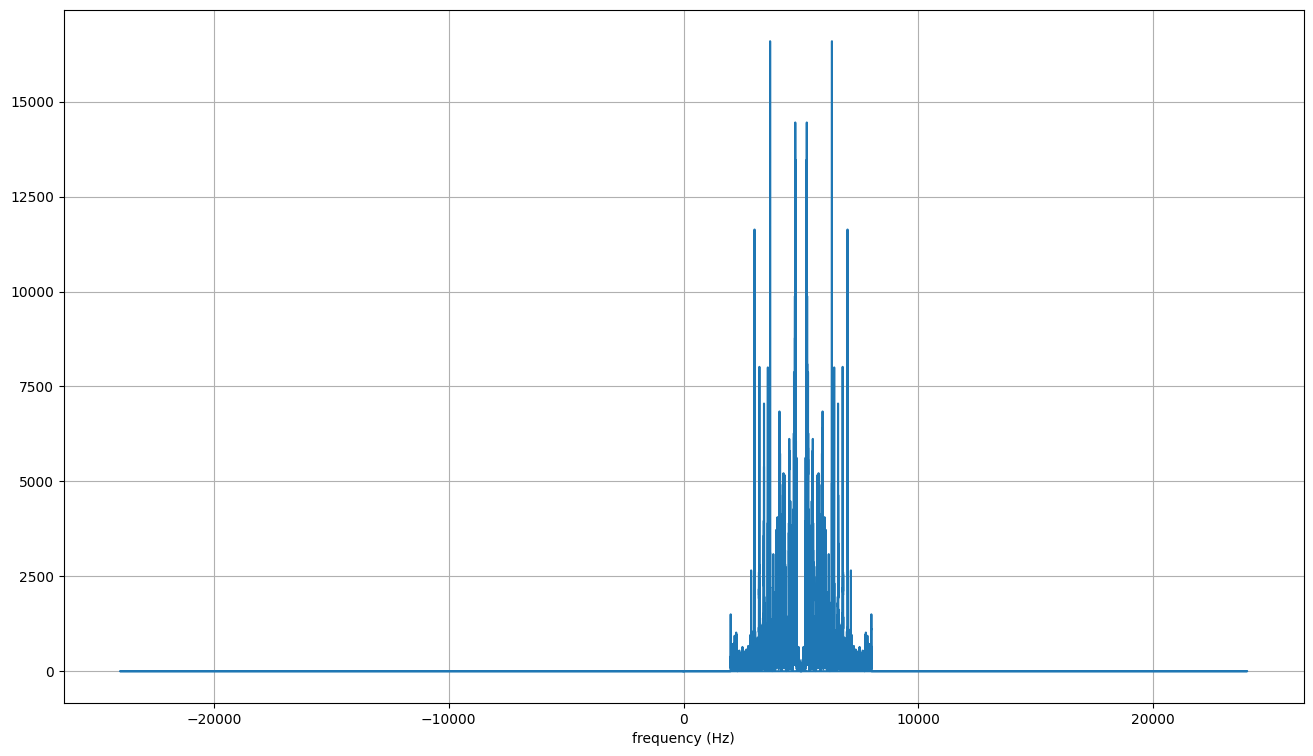

In [ ]:
f = 5000
h = np.exp(1j*2*np.pi*f*t)

#s1 = np.conj(h)*r1
s1 = h*r1
S1 = np.fft.fft(s1)
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(S1))
plt.xlabel('frequency (Hz)')
plt.grid('on')
plt.show()

In [ ]:
Audio(h*r1,rate=fs)

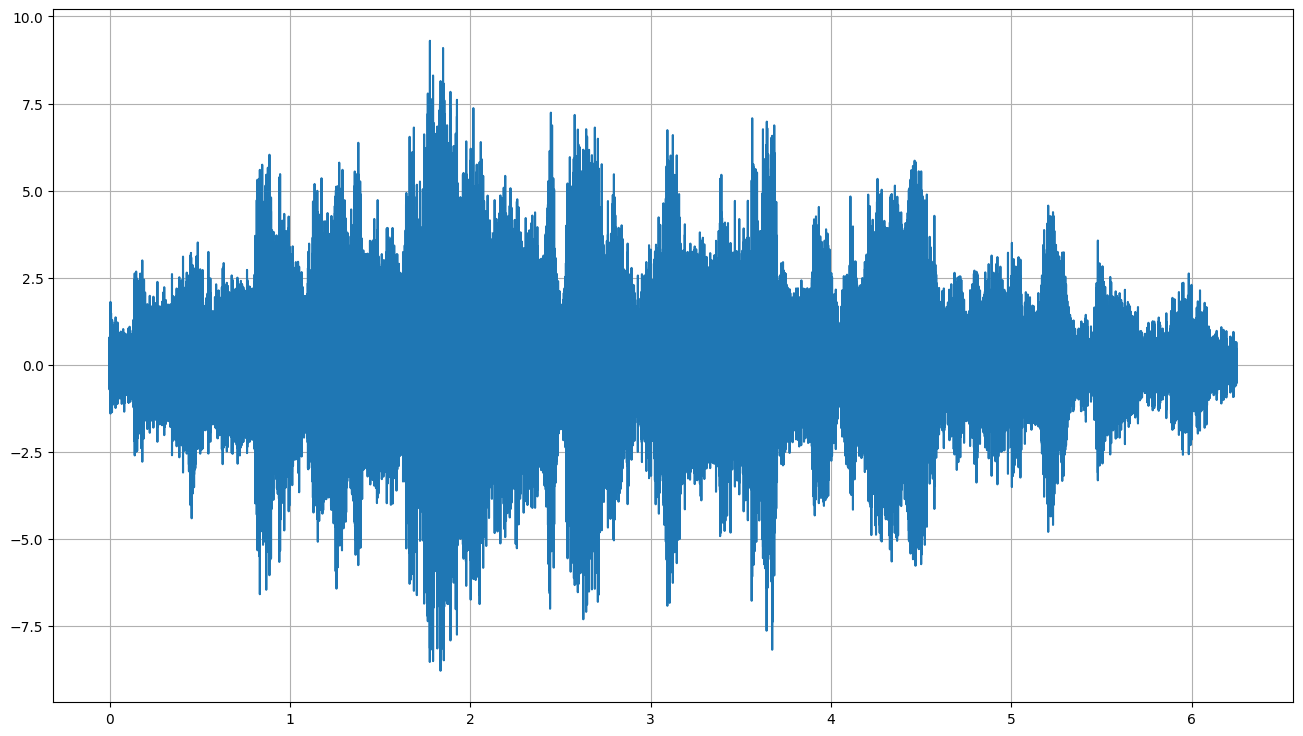

In [ ]:
f0 = -500
h0 = np.exp(1j*2*np.pi*f0*t)

f = 5000
h = np.exp(1j*2*np.pi*f*t)


c =  h0*(np.conj(h)*r1 + h*r2 + np.conj(h)*np.conj(h)*np.conj(h)*r3 + h*h*h*r4)
plt.figure(figsize=(16,9))
plt.plot(t,np.real(c))
plt.grid('on')
plt.show()

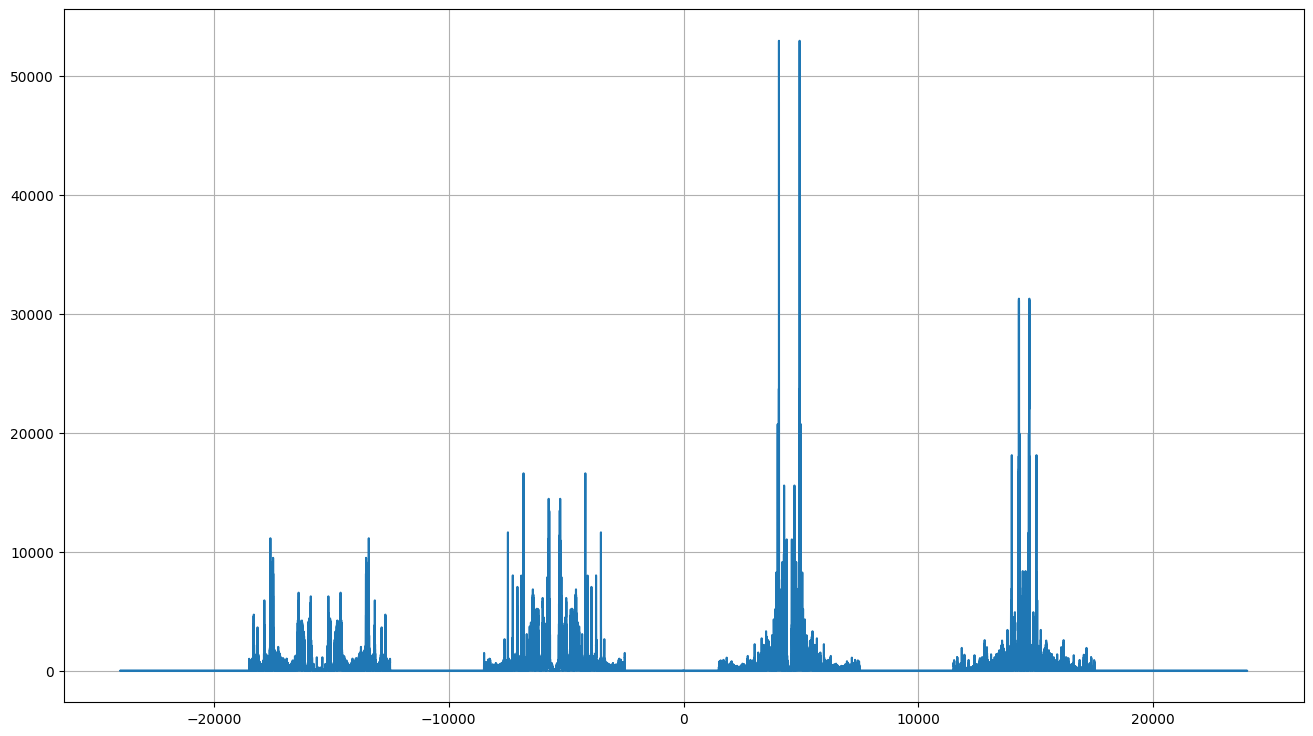

In [ ]:
C = np.fft.fft(c)
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(C))
plt.grid('on')
plt.show()

- 합성된 신호가 어떻게 들리는 지 확인해 봅니다.

In [ ]:
Audio(c,rate=fs)

## 한 사람의 음성신호를 복원하기
- 위의 과정을 통해 합성된 신호는 각각 다른 학생의 음성이 다른 주파수 대역에 정보를 가지고 있습니다. 
- 각각 학생의 음성을 담고 있는 주파수 대역을 알고 있으면, demodulation 및 lowpass filtering을 통해 해당 학생의 음성을 선택적으로 복원할 수 있습니다.
- demodulation
- lowpass filtering

In [ ]:
fr = 5200 # frequency for demodulation 
wr = 3000 # frequency for lowpass filtering

hr = np.exp(1j*2*np.pi*fr*t)
LR = np.ones_like(c)
LR[np.abs(freq)>wr]=0


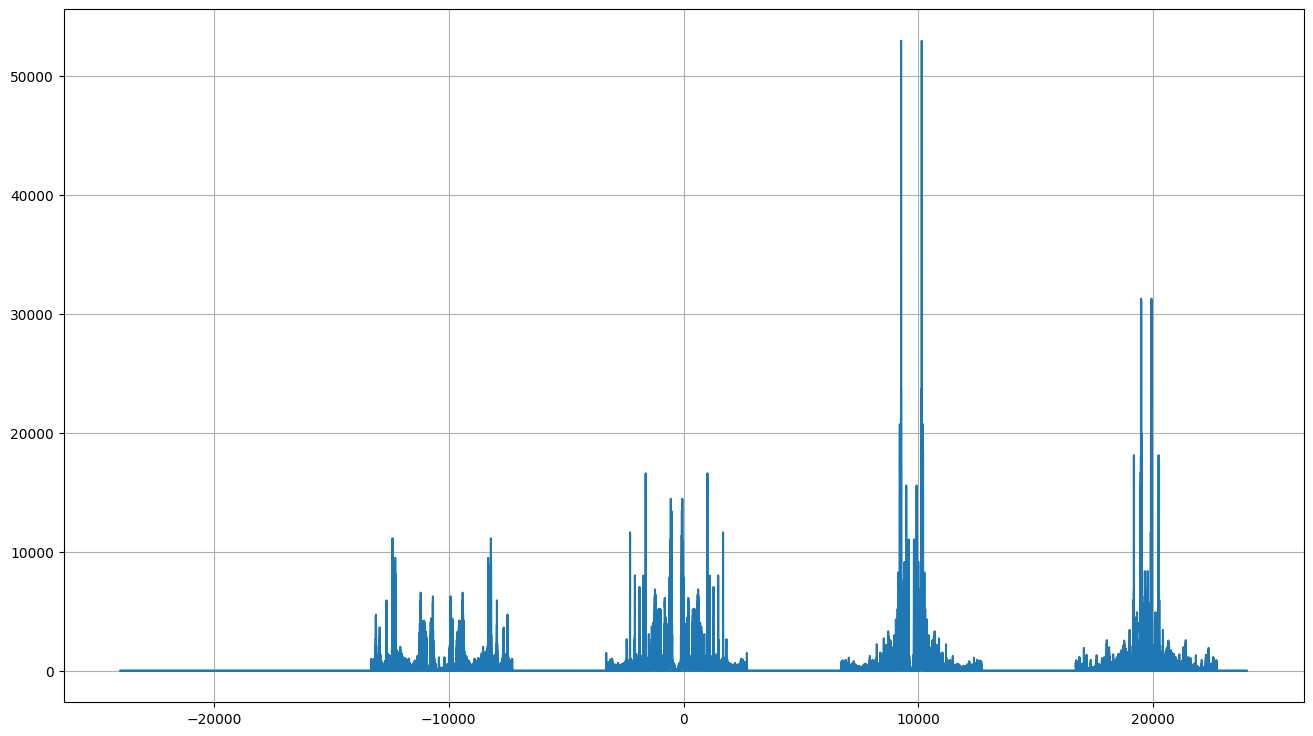

In [ ]:
rd = c*hr
RD = np.fft.fft(rd)
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(RD))
plt.grid('on')
plt.show()

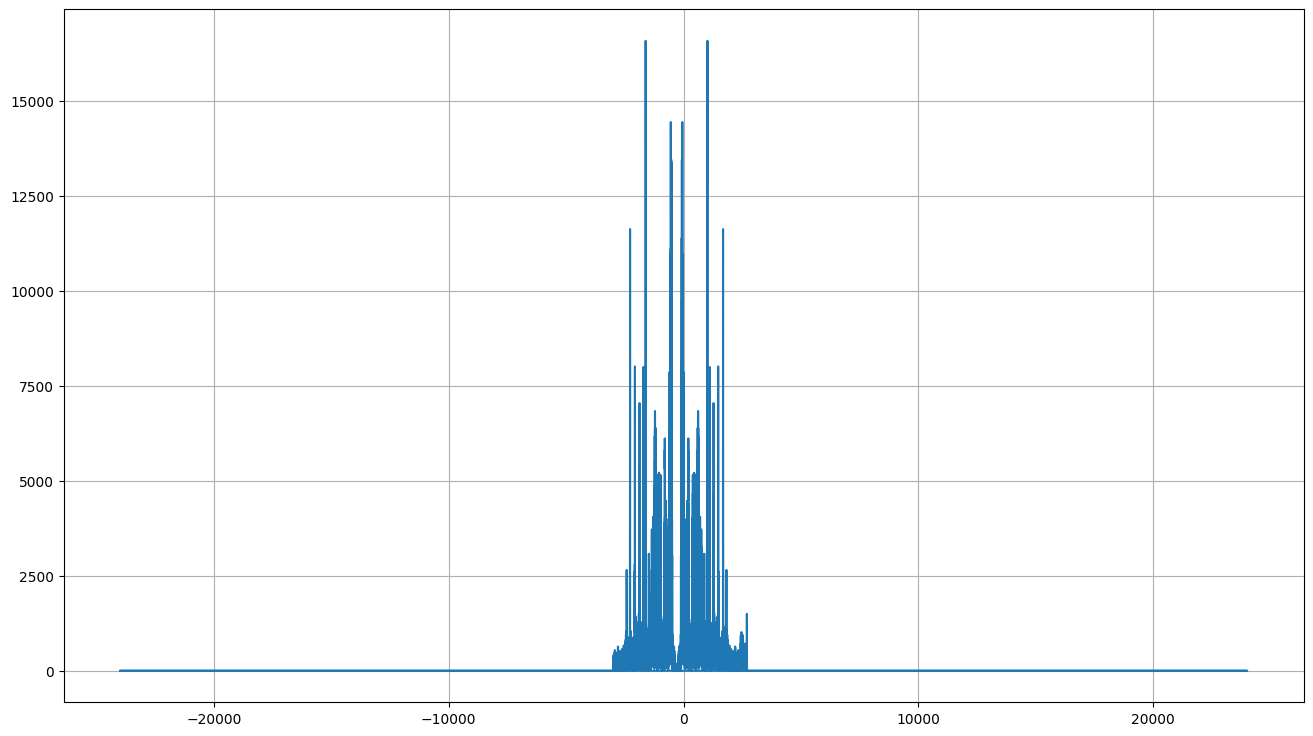

In [ ]:
RDL = RD*LR
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(RDL))
plt.grid('on')
plt.show()

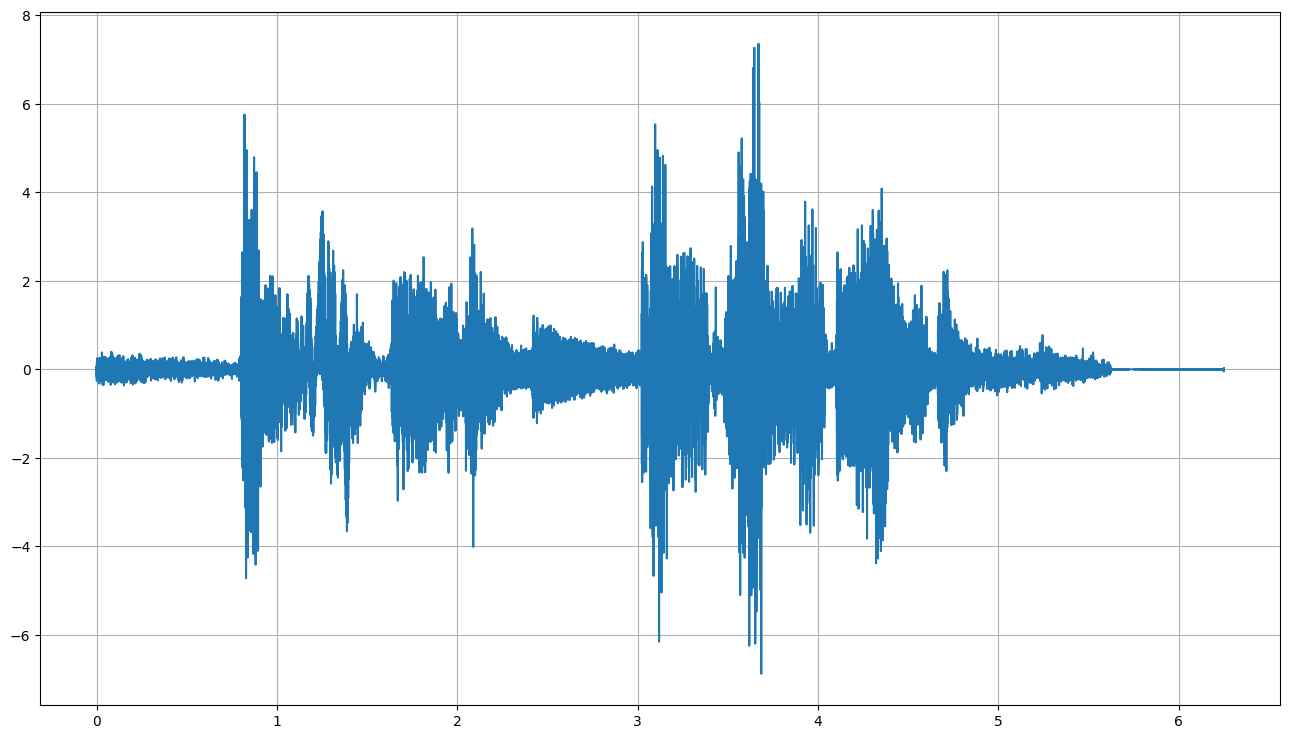

In [ ]:
rdl = np.fft.ifft(RDL)
plt.figure(figsize=(16,9))
plt.plot(t,np.real(rdl))
plt.grid('on')
plt.show()

In [ ]:
Audio(rdl,rate=fs)